In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the iris dataset from seaborn
df = sns.load_dataset('iris')

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
pd.unique(df['species'])

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [5]:
pd.value_counts(df['species'])

C:\Users\AVANISH SINGH\AppData\Local\Temp\ipykernel_24548\430893850.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df['species'])


species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

### Logistic Regression

In [6]:
# in x we take all features except species
x = df.drop('species', axis=1)
# in y we take the species column
y = df['species']


In [7]:
# split the data into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

In [8]:
# Import the logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [9]:
# Train the model
model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [10]:
# Predict the species for the testing set
predictions = model.predict(x_test)
predictions

array(['virginica', 'setosa', 'virginica', 'setosa', 'virginica',
       'virginica', 'setosa', 'setosa', 'virginica', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'virginica',
       'setosa', 'virginica', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'virginica', 'setosa',
       'versicolor', 'virginica', 'virginica', 'setosa'], dtype=object)

In [11]:
# print the predictions
y_test

128     virginica
11         setosa
118     virginica
15         setosa
123     virginica
135     virginica
32         setosa
1          setosa
116     virginica
45         setosa
40         setosa
115     virginica
26         setosa
28         setosa
145     virginica
97     versicolor
62     versicolor
77     versicolor
122     virginica
112     virginica
125     virginica
31         setosa
146     virginica
29         setosa
69     versicolor
149     virginica
75     versicolor
20         setosa
73     versicolor
120     virginica
81     versicolor
99     versicolor
119     virginica
12         setosa
16         setosa
51     versicolor
46         setosa
89     versicolor
136     virginica
114     virginica
41         setosa
90     versicolor
102     virginica
109     virginica
37         setosa
Name: species, dtype: object

In [12]:
# Calculate the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
accuracy

0.9777777777777777

In [13]:

# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.92      1.00      0.96        11
   virginica       1.00      0.94      0.97        18

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [14]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, predictions)
conf_matrix
# sns.heatmap(conf_matrix, annot=True, cmap='Blues')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()

array([[16,  0,  0],
       [ 0, 11,  0],
       [ 0,  1, 17]])

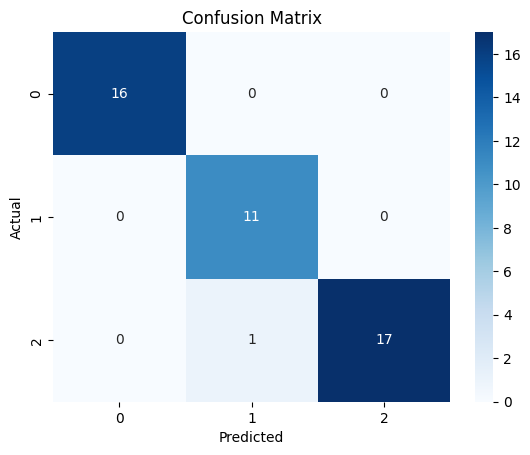

In [15]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, predictions)
conf_matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()